# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [4]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [5]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [6]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Verificación después de imputación:
0 valores nulos totales


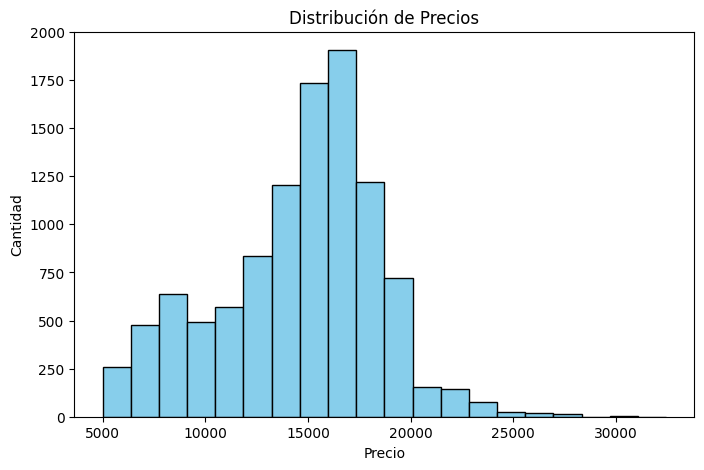

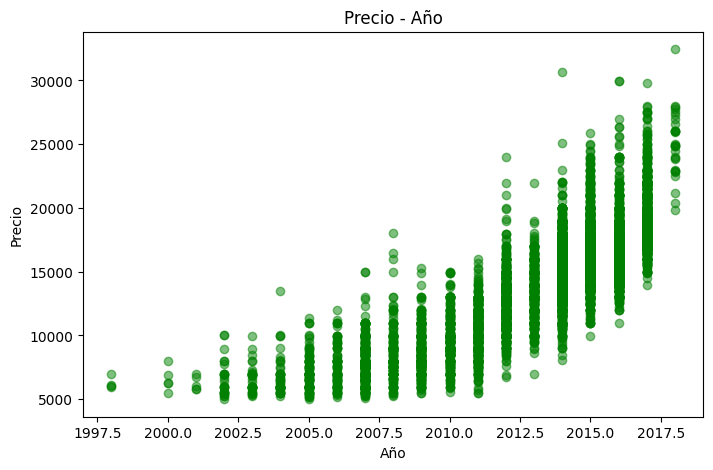

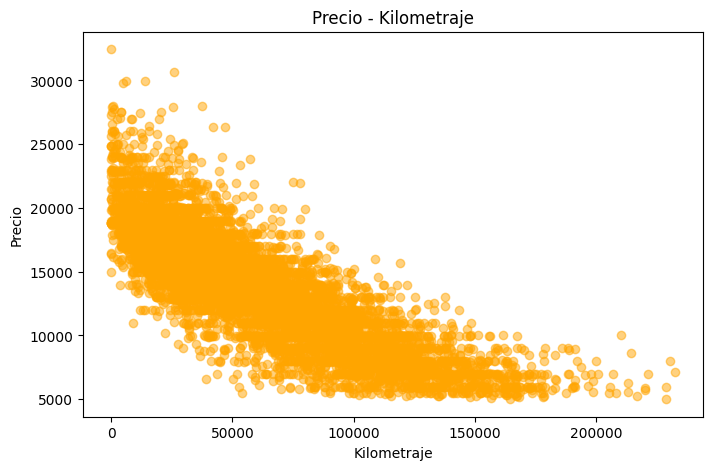


Exploración y análisis completos


In [ ]:
# celda 0 - exploracion y analisis de datos


# Verificación de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# Imputación básica si hay datos faltantes
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

print("\nVerificación después de imputación:")
print(data.isnull().sum().sum(), "valores nulos totales")


#  Visualizaciones



plt.figure(figsize=(8,5))
plt.hist(data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('Distribución de Precios')
plt.show()


plt.figure(figsize=(8,5))
plt.scatter(data['Year'], data['Price'], alpha=0.5, color='green')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Precio - Año')
plt.show()


if 'Mileage' in data.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(data['Mileage'], data['Price'], alpha=0.5, color='orange')
    plt.xlabel('Kilometraje')
    plt.ylabel('Precio')
    plt.title('Precio - Kilometraje')
    plt.show()

print("\nExploración y análisis completos")




### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 1
# Random Forest para regresión


rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar resultados
print("Desempeño del modelo RF:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

# Comentario sobre el desempeño
print("\n--- Comentarios sobre el desempeño ---")
print(f"- El R² de {r2:.3f} indica que el modelo explica aproximadamente el {r2*100:.1f}% de la variabilidad en los precios.")
print(f"- El MAE de ${mae:.2f} significa que en promedio el modelo se equivoca por este monto.")
print(f"- El MAPE de {mape:.2f}% indica el error porcentual promedio respecto al precio real.")

if r2 > 0.75:
    print("- El modelo tiene un buen desempeño para predecir precios de automóviles.")
else:
    print("- El modelo podría mejorarse con calibración de hiperparámetros.")

Desempeño del modelo RF:
Mean Squared Error: 3116678.92
R^2 Score: 0.796
Mean Absolute Error (MAE): 1314.42
Mean Absolute Percentage Error (MAPE): 9.55 %

--- Comentarios sobre el desempeño ---
- El R² de 0.796 indica que el modelo explica aproximadamente el 79.6% de la variabilidad en los precios.
- El MAE de $1314.42 significa que en promedio el modelo se equivoca por este monto.
- El MAPE de 9.55% indica el error porcentual promedio respecto al precio real.
- El modelo tiene un buen desempeño para predecir precios de automóviles.


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.


In [ ]:
# Celda 2
# Calibración de hiperparámetros con RandomizedSearchCV
# Definición del modelo base
rf = RandomForestRegressor(random_state=42)

# Definición del espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20, 25, None],
    'max_features': [2, 4, 6, 8, 'auto', 'sqrt']
}

# Configuración de la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                
    cv=3,                    
    scoring='r2',             
    random_state=42,
    n_jobs=-1                 
)

# Ejecución de la búsqueda
random_search.fit(X_train, y_train)


print("Mejores parámetros encontrados:")
print(random_search.best_params_)

print(f"\nMejor puntaje (R² CV): {random_search.best_score_:.4f}")



Mejores parámetros encontrados:
{'n_estimators': 150, 'max_features': 6, 'max_depth': 10}

Mejor puntaje (R² CV): 0.8445


In [25]:
#Encontrar los mejores hiperparametros: 

#Entrenar el modelo con los mejores hiperparámetros encontrados:

best_params = random_search.best_params_

modelo_optimo = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    random_state=42
)

modelo_optimo.fit(X_train, y_train)

# Predicción y evaluación
y_pred_opt = modelo_optimo.predict(X_test)

rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
r2_opt = r2_score(y_test, y_pred_opt)

print("Desempeño del modelo optimizado:")
print(f"RMSE: {rmse_opt:.2f}")
print(f"R²: {r2_opt:.4f}")


Desempeño del modelo optimizado:
RMSE: 1571.22
R²: 0.8386


      Variable  Importancia
0         Year     0.583519
1      Mileage     0.357999
3   M_Camry4dr     0.019350
8   M_CamryXLE     0.016363
2      M_Camry     0.008555
6    M_CamryLE     0.007848
7    M_CamrySE     0.005146
5     M_CamryL     0.000896
4  M_CamryBase     0.000324


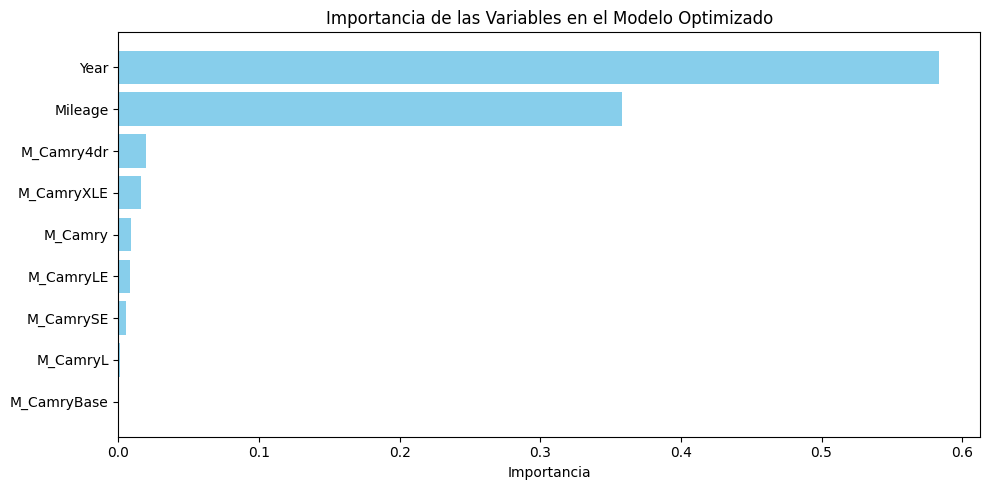

In [26]:
#Importancia de los predictores

importancias = modelo_optimo.feature_importances_

tabla_importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

# Mostrar tabla
print(tabla_importancia)

# Gráfico de importancia
plt.figure(figsize=(10, 5))
plt.barh(tabla_importancia['Variable'], tabla_importancia['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo Optimizado')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [2]:
#celda 3
print("Analisis y conclusiones")
print("""
1. En el Punto 0, se observó que el conjunto de datos no presenta valores nulos 
   y que la variable objetivo (Precio) tiene una distribución con tendencia hacia la derecha, 
   concentrándose en valores entre 10.000 y 20.000 dólares. 
   Además, se ve una relación buena de año/precio del vehículo, 
   y una relación negativa de kilometraje/precio, lo cual tiene un sentido económico.

2. En el Punto 1, el Random Forest base alcanzó un R² de 0.796 y un MAPE de 9.55%, 
   lo que indica que explica aproximadamente el 79.6% de la variabilidad en los precios, 
   con un error promedio del 9% aproximadamente, esto demuestra un buen desempeño sin necesidad de un gran ajuste inicial.

3. Tras calibrar los hiperparámetros en el punto 2, el modelo optimizado alcanzó un R² de 0.8386 y redujo 
   el RMSE a 1571.22, lo cual representa una mejora significativa en la capacidad predictiva. 
   Los parámetros más influyentes fueron:
      - n_estimators: número de árboles, que incrementó la estabilidad del modelo.
      - max_depth: controló el nivel de complejidad del bosque, evitando sobreajuste.
      - max_features: determinó cuántas variables considerar en cada división, mejorando la generalización.

4. En el análisis de importancia de variables, las más determinantes fueron 'Year' y 'Mileage', 
   seguidas por las variables que representan los distintos modelos de Camry. 
   Esto confirma que los factores más influyentes en el precio son la antigüedad del vehículo 
   y su kilometraje.

5. En conclusión, el modelo Random Forest calibrado ofrece una buena predicción y confiable 
   del precio de automóviles tipo Camry. 
   Pero, se podrían explorar mejores transformaciones para mejorar aún más el desempeño
""")


Analisis y conclusiones

1. En el Punto 0, se observó que el conjunto de datos no presenta valores nulos 
   y que la variable objetivo (Precio) tiene una distribución con tendencia hacia la derecha, 
   concentrándose en valores entre 10.000 y 20.000 dólares. 
   Además, se ve una relación buena de año/precio del vehículo, 
   y una relación negativa de kilometraje/precio, lo cual tiene un sentido económico.

2. En el Punto 1, el Random Forest base alcanzó un R² de 0.796 y un MAPE de 9.55%, 
   lo que indica que explica aproximadamente el 79.6% de la variabilidad en los precios, 
   con un error promedio del 9% aproximadamente, esto demuestra un buen desempeño sin necesidad de un gran ajuste inicial.

3. Tras calibrar los hiperparámetros en el punto 2, el modelo optimizado alcanzó un R² de 0.8386 y redujo 
   el RMSE a 1571.22, lo cual representa una mejora significativa en la capacidad predictiva. 
   Los parámetros más influyentes fueron:
      - n_estimators: número de árboles, que

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.